In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
returns = pd.read_csv(
    './data/Portfolios_Formed_on_ME_monthly_EW.csv',
    header=0, index_col=0, parse_dates=True, na_values=-99.99
)
print(returns.shape)
returns.head()

(1110, 19)


,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [3]:
# Returns of the smallest and largest 10% of stocks
returns = returns[['Lo 10', 'Hi 10']]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [4]:
returns = returns / 100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [5]:
returns.columns = ['SmallCap', 'LargeCap']
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


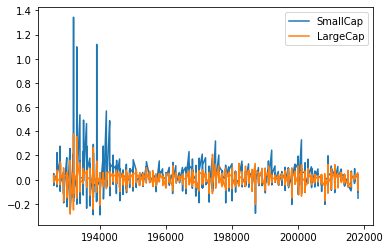

In [6]:
returns.plot.line()

In [7]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

Annualized volatility

$$\sigma_{ann} = \sigma_{P} \sqrt P$$

In [8]:
annualized_volatility = returns.std() * np.sqrt(12)
annualized_volatility

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [9]:
n_months = returns.shape[0]
return_per_month = (returns + 1).prod()**(1 / n_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [10]:
annualized_returns = (return_per_month + 1)**12 - 1
annualized_returns

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [11]:
annualized_returns = (returns + 1).prod()**(12 / n_months) - 1
annualized_returns

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

Return on Risk ratio: How much return per unit of risk

$$RoR = \frac{Return}{Volatility}$$

In [12]:
RoR = annualized_returns / annualized_volatility
RoR

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

Sharpe ratio: excess return over the risk free rate

$$SR = \frac{R_P - R_f}{\sigma_P}$$

In [13]:
Rf = 0.03
sharpe_ratio = (annualized_returns - Rf) / annualized_volatility
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64